In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers, models, optimizers

2024-05-02 09:19:23.880630: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered

2024-05-02 09:19:23.880756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered

2024-05-02 09:19:24.009432: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Reading metadata**


In [3]:
import pandas as pd
df_metadata=pd.read_csv("/kaggle/input/gravity-spy-gravitational-waves/trainingset_v1d1_metadata.csv")

In [4]:
df_new = pd.read_csv("/kaggle/input/l1-o3b/L1_O3b.csv")

In [5]:
df_new.head

<bound method NDFrame.head of           event_time ifo   peak_time  peak_time_ns  start_time  start_time_ns  \
0       1.257857e+09  L1  1257856978     304687023  1257856978              0   
1       1.257853e+09  L1  1257852947     187500000  1257852946      500000000   
2       1.257857e+09  L1  1257856887     595213890  1257856887              0   
3       1.257850e+09  L1  1257849846     810547113  1257849846      134764909   
4       1.257850e+09  L1  1257850078     597656011  1257850078      562500000   
...              ...  ..         ...           ...         ...            ...   
192688  1.262371e+09  L1  1262370615     937500000  1262370614      750000000   
192689  1.262374e+09  L1  1262373990     187500000  1262373989      500000000   
192690  1.262372e+09  L1  1262371897     187500000  1262371895      750000000   
192691  1.262362e+09  L1  1262361507     632812023  1262361507      183593034   
192692  1.262375e+09  L1  1262374901      62500000  1262374899      750000000  

In [6]:
df_new.columns

Index(['event_time', 'ifo', 'peak_time', 'peak_time_ns', 'start_time',
       'start_time_ns', 'duration', 'peak_frequency', 'central_freq',
       'bandwidth', 'channel', 'amplitude', 'snr', 'q_value', 'gravityspy_id',
       '1400Ripples', '1080Lines', 'Air_Compressor', 'Blip', 'Chirp',
       'Extremely_Loud', 'Helix', 'Koi_Fish', 'Light_Modulation',
       'Low_Frequency_Burst', 'Low_Frequency_Lines', 'No_Glitch',
       'None_of_the_Above', 'Paired_Doves', 'Power_Line', 'Repeating_Blips',
       'Scattered_Light', 'Scratchy', 'Tomte', 'Violin_Mode', 'Wandering_Line',
       'Whistle', 'ml_label', 'ml_confidence', 'url1', 'url2', 'url3', 'url4'],
      dtype='object')

In [7]:
num_labels= df_metadata["label"].nunique()#number of labels

In [8]:
df_metadata["label"].value_counts()

label
Blip                   1821
Koi_Fish                706
Low_Frequency_Burst     621
Light_Modulation        512
Power_Line              449
Extremely_Loud          447
Low_Frequency_Lines     447
Scattered_Light         443
Violin_Mode             412
Scratchy                337
1080Lines               328
Whistle                 299
Helix                   279
Repeating_Blips         263
No_Glitch               150
Tomte                   103
None_of_the_Above        81
1400Ripples              81
Chirp                    60
Air_Compressor           58
Wandering_Line           42
Paired_Doves             27
Name: count, dtype: int64

In [9]:
label_names=list(df_metadata["label"].value_counts().index)

**Importing Image Data**


In [10]:
import tensorflow as tf
directory= "/kaggle/input/gravity-spy-gravitational-waves/train/train/"
(train_dataset,validation_dataset)=tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    subset="both",
    shuffle=True,
    seed=69,
    validation_split=0.2,
)

Found 22348 files belonging to 22 classes.

Using 17879 files for training.

Using 4469 files for validation.


In [11]:
for i in train_dataset.take(3):
    print(i[1])
    print(i[0][0].shape)

tf.Tensor(

[10  3  8  9  9  0  7  5 18 13 17  1 19  9  3  8 12 19  5  3  9 14 10  3

  9 17  5 10 10 16  3 17], shape=(32,), dtype=int32)

(256, 256, 3)

tf.Tensor(

[10  3  7  5 19  0 19  7 19  3  9 12 19 17  3  5  9  3  6 14  3  8  8 14

 16  4  3  7  8  3  5  6], shape=(32,), dtype=int32)

(256, 256, 3)

tf.Tensor(

[ 9 12  9 19  3 14 11 14  5  5 14 17 21  0  8 17  7 11 14 16 21 14  7 10

  9  3  3  8  9 12  9 14], shape=(32,), dtype=int32)

(256, 256, 3)


In [12]:
import tensorflow as tf
directory= "/kaggle/input/gravity-spy-gravitational-waves/test/test/"
test_dataset=tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    image_size=(256, 256),
    shuffle=False
)

Found 4720 files belonging to 22 classes.


In [13]:
class_names=train_dataset.class_names
print(class_names)

['1080Lines', '1400Ripples', 'Air_Compressor', 'Blip', 'Chirp', 'Extremely_Loud', 'Helix', 'Koi_Fish', 'Light_Modulation', 'Low_Frequency_Burst', 'Low_Frequency_Lines', 'No_Glitch', 'None_of_the_Above', 'Paired_Doves', 'Power_Line', 'Repeating_Blips', 'Scattered_Light', 'Scratchy', 'Tomte', 'Violin_Mode', 'Wandering_Line', 'Whistle']


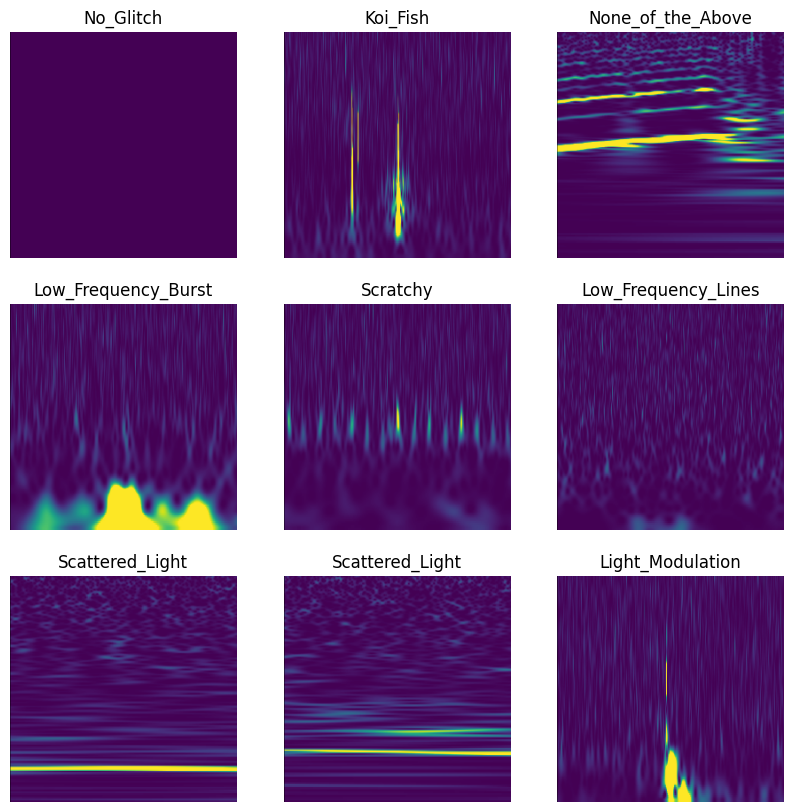

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
#Custom Label smoothing loss function
class LabelSmoothingLoss(tf.keras.losses.Loss):
    def __init__(self, smoothing=0.1):
        super(LabelSmoothingLoss, self).__init__()
        self.smoothing =  smoothing
        
    def call(self, y_true, y_pred):
        num_classes = y_pred.shape[-1]
        confidence = 1.0 - self.smoothing
        smooth_labels = tf.one_hot(tf.cast(y_true, tf.int32), depth=num_classes)
        smooth_labels = smooth_labels * confidence + (1 - confidence)/num_classes
        return tf.keras,losses.categorical_crossentropy(smooth_labels, y_pred)

**Model building, training and testing**


In [17]:
# Function to create a convolutional block
def conv_block(input_tensor, filters, kernel_size):
    x = layers.Conv2D(filters, kernel_size, padding='same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    return x

In [18]:
# Function to create an inception residual block
def inception_residual_block(input_tensor, filters):
    x1 = layers.Conv2D(filters, (1, 1), padding='same')(input_tensor)

    x2 = layers.Conv2D(filters, (1, 1), padding='same', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
    x2 = layers.ReLU()(x2)
    x2 = layers.Conv2D(filters, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01))(x2)

    x3 = layers.Conv2D(filters, (1, 1), padding='same', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
    x3 = layers.ReLU()(x3)
    x3 = layers.Conv2D(filters, (5, 5), padding='same', kernel_regularizer=regularizers.l2(0.01))(x3)

    x4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_tensor)
    x4 = layers.Conv2D(filters, (1, 1), padding='same', kernel_regularizer=regularizers.l2(0.01))(x4)

    x = layers.concatenate([x1, x2, x3, x4], axis=-1)
    return x

In [19]:
# Function to create a post-convolutional block
def post_conv_block(input_tensor, filters, kernel_size):
    x = layers.Conv2D(filters, kernel_size, padding='same')(input_tensor)
    x = layers.ReLU()(x)
    x = layers.BatchNormalization()(x)
    return x

In [20]:
# Function to create the complete branch
def branch(input_tensor):
    x = conv_block(input_tensor, filters=32, kernel_size=(3, 3))
    for _ in range(3):
        x = inception_residual_block(x, filters=32)
        x = post_conv_block(x, filters=32, kernel_size=(3, 3))
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x) # Dropout after FC layer
    return x

In [21]:
# Input layer
input_tensor = layers.Input(shape=(256, 256, 3))

# Load VGG19 model with pre-trained ImageNet weights
base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

#Here above, we will use VGG16 model when working with VGG16 and rest all the code remains same

# Freeze the pre-trained weights
base_model.trainable = False


80134624/80134624 [==============================] - 2s 0us/step


In [22]:
# Get output of model
output = base_model.output

# Create four branches sharing common architecture
branches = [branch(output) for _ in range(4)]

# Concatenate the output of branches
x = layers.concatenate(branches)

In [23]:
from tensorflow.keras import layers, regularizers

# Reshape tensor to (None, 1, 1, num_features)
intermediate_features = layers.Reshape((1, 1, -1))(x)

# Attention module (weighted average)
x = layers.Conv2D(filters=1, kernel_size=1, activation='relu')(intermediate_features)  # Apply convolution to generate attention weights
x = layers.Flatten()(x)  # Flatten the attention weights
x = layers.Activation('softmax')(x)  # Apply softmax to ensure weights sum up to 1
x = layers.Reshape((-1, 1, 1))(x)  # Reshape to broadcast attention weights
x = layers.Multiply()([intermediate_features, x])  # Apply attention weights to intermediate features

# Final FC layer for classification
x = layers.GlobalAveragePooling2D()(x)  # Global average pooling to reduce spatial dimensions
x = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Dense layer with regularization
x = layers.Dropout(0.5)(x)  # Dropout for regularization
output = layers.Dense(22, activation='softmax')(x)  # Final classification layer

In [25]:
num_classes=22

#Create the model
output = layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [26]:
# Compile the models
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
#model.build(input_shape=(256,256,3))
model.summary()

Model: "model"

__________________________________________________________________________________________________

 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            

                                                                                                  

 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_1[0][0]']             

                                                                                                  

 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        

                                                                                                  

 block1_pool (MaxPooling2D)  (None, 128, 128, 64)         0         ['block1_conv2[0][0]']        

                                                                                   

In [29]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=5,   
    min_delta=0.005,
    restore_best_weights=True  
)

checkpoint_filepath = 'model_checkpoint.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [30]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[model_checkpoint_callback, early_stopping_callback]  
)

Epoch 1/10



I0000 00:00:1714641744.950978     397 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


559/559 [==============================] - ETA: 0s - loss: 38.4266 - accuracy: 0.3600

Epoch 1: val_loss improved from inf to 1721.68079, saving model to model_checkpoint.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


559/559 [==============================] - 149s 193ms/step - loss: 38.4266 - accuracy: 0.3600 - val_loss: 1721.6808 - val_accuracy: 0.6039

Epoch 2/10

559/559 [==============================] - ETA: 0s - loss: 35.5264 - accuracy: 0.6259

Epoch 2: val_loss did not improve from 1721.68079

559/559 [==============================] - 88s 158ms/step - loss: 35.5264 - accuracy: 0.6259 - val_loss: 1779.7626 - val_accuracy: 0.7306

Epoch 3/10

559/559 [==============================] - ETA: 0s - loss: 33.0729 - accuracy: 0.7408

Epoch 3: val_loss did not improve from 1721.68079

559/559 [==============================] - 88s 158ms/step - loss: 33.0729 - accuracy: 0.7408 - val_loss: 1978.9830 - val_accuracy: 0.7876

Epoch 4/10

559/559 [==============================] - ETA: 0s - loss: 30.6817 - accuracy: 0.8045

Epoch 4: val_loss did not improve from 1721.68079

559/559 [==============================] - 88s 158ms/step - loss: 30.6817 - accuracy: 0.8045 - val_loss: 2257.8298 - val_accuracy: 0

In [31]:
# Load the best model saved by ModelCheckpoint
best_model = tf.keras.models.load_model(checkpoint_filepath)

# Fine-tune the model
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_from = 'block5_conv1'

for layer in base_model.layers:
    if layer.name == fine_tune_from:
        break
    layer.trainable = False

# Compile the model again after fine-tuning
best_model.compile(optimizer=optimizers.Adam(learning_rate=1e-6),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [32]:
# Continue training the best model with fine-tuning
history_fine_tune = best_model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[model_checkpoint_callback, early_stopping_callback]
)

Epoch 1/10

559/559 [==============================] - ETA: 0s - loss: 36.6896 - accuracy: 0.5514

Epoch 1: val_loss improved from 1721.68079 to 1681.43530, saving model to model_checkpoint.h5

559/559 [==============================] - 123s 162ms/step - loss: 36.6896 - accuracy: 0.5514 - val_loss: 1681.4353 - val_accuracy: 0.6174

Epoch 2/10

559/559 [==============================] - ETA: 0s - loss: 36.5148 - accuracy: 0.5657

Epoch 2: val_loss did not improve from 1681.43530

559/559 [==============================] - 88s 157ms/step - loss: 36.5148 - accuracy: 0.5657 - val_loss: 1689.9336 - val_accuracy: 0.6301

Epoch 3/10

559/559 [==============================] - ETA: 0s - loss: 36.3508 - accuracy: 0.5816

Epoch 3: val_loss did not improve from 1681.43530

559/559 [==============================] - 88s 157ms/step - loss: 36.3508 - accuracy: 0.5816 - val_loss: 1723.6101 - val_accuracy: 0.6420

Epoch 4/10

559/559 [==============================] - ETA: 0s - loss: 36.1885 - accurac

In [ ]:
test_loss, test_accuracy = best_model.evaluate(test_dataset)

In [35]:
predicted=best_model.predict(test_dataset)

148/148 [==============================] - 17s 105ms/step


In [36]:
predicted_labels = np.argmax(predicted, axis=1)

In [37]:
true_labels=[]
for element in test_dataset:
    true_labels.extend(element[1].numpy())

In [38]:
label_names.sort()
label_names

['1080Lines',
 '1400Ripples',
 'Air_Compressor',
 'Blip',
 'Chirp',
 'Extremely_Loud',
 'Helix',
 'Koi_Fish',
 'Light_Modulation',
 'Low_Frequency_Burst',
 'Low_Frequency_Lines',
 'No_Glitch',
 'None_of_the_Above',
 'Paired_Doves',
 'Power_Line',
 'Repeating_Blips',
 'Scattered_Light',
 'Scratchy',
 'Tomte',
 'Violin_Mode',
 'Wandering_Line',
 'Whistle']

In [39]:
df = pd.DataFrame(0,index=label_names, columns=label_names)

In [40]:
indices=len(predicted_labels)
for i in range(indices):             
    df.loc[label_names[predicted_labels[i]],label_names[true_labels[i]]]+=1

In [41]:
df

,1080Lines,1400Ripples,Air_Compressor,Blip,Chirp,Extremely_Loud,Helix,Koi_Fish,Light_Modulation,Low_Frequency_Burst,...,None_of_the_Above,Paired_Doves,Power_Line,Repeating_Blips,Scattered_Light,Scratchy,Tomte,Violin_Mode,Wandering_Line,Whistle
1080Lines,184,30,1,1,0,0,12,0,1,8,...,5,0,20,0,9,4,0,94,2,52
1400Ripples,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air_Compressor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blip,4,0,1,1069,24,11,64,76,80,3,...,5,2,0,125,2,55,27,19,0,15
Chirp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Extremely_Loud,0,0,0,2,0,160,0,8,3,0,...,0,8,0,2,1,0,0,0,1,0
Helix,0,0,0,2,0,0,41,0,0,0,...,0,2,0,6,3,1,0,9,0,1
Koi_Fish,0,0,0,2,3,34,0,278,17,0,...,0,0,0,1,0,0,11,0,0,0
Light_Modulation,0,0,0,0,0,4,0,1,48,0,...,1,0,0,1,0,0,0,0,0,0
Low_Frequency_Burst,1,0,1,3,8,34,4,38,124,308,...,15,3,0,0,4,6,8,1,1,4


**Classification Reports, Confusion Matrices**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert true_labels from tensor to numpy array
true_labels = np.array(true_labels)

# Generate classification report
print(classification_report(true_labels, predicted_labels))


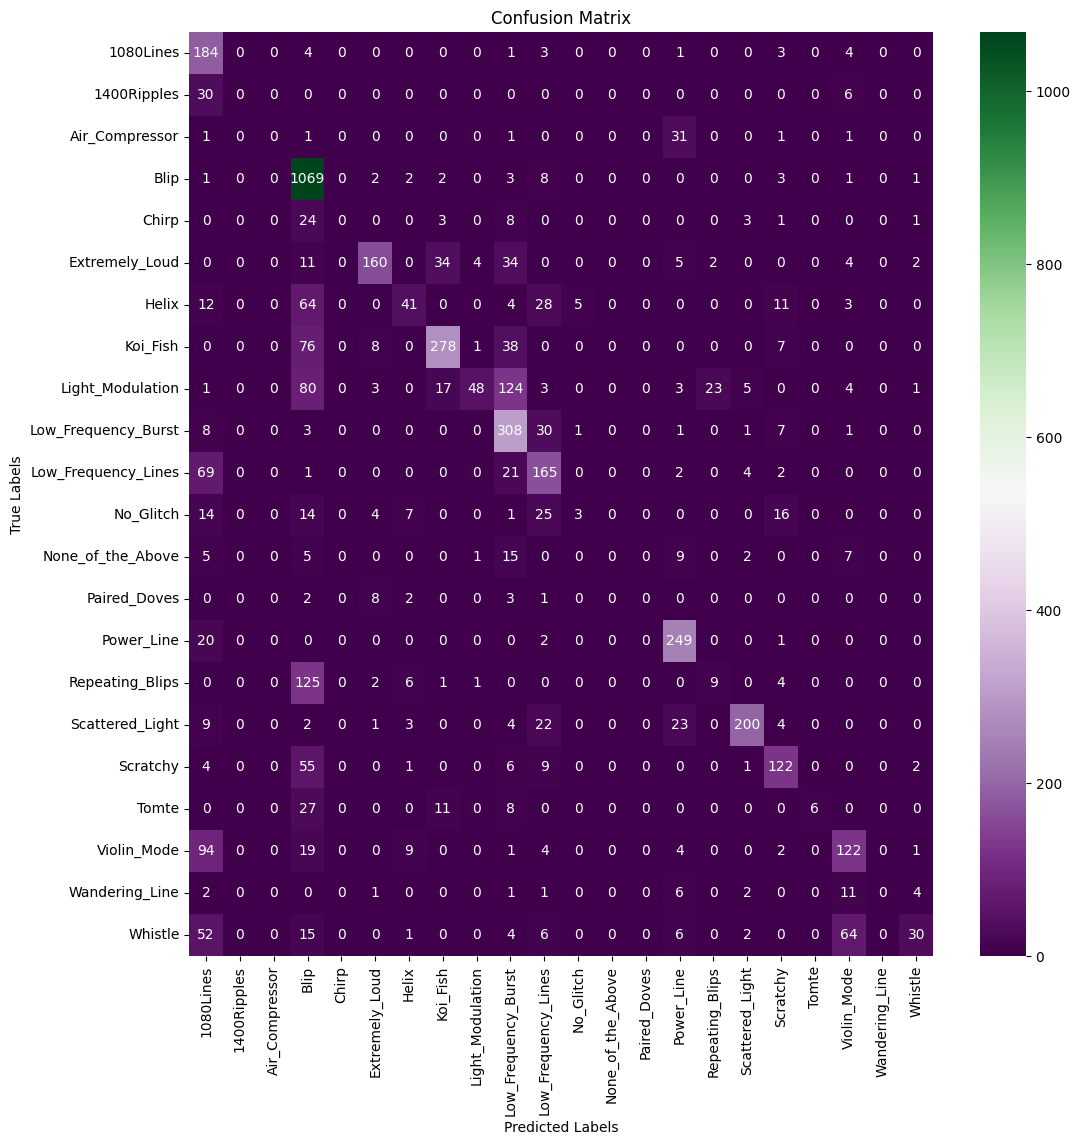

In [43]:
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='PRGn', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()